# Introduction to Data Science  - Homework 

![Algebra](https://repozitorij.algebra.hr/sites/repozitorij.algebra.hr/files/algebra_subbrand_vu_color-black_h_1.png)

=========================================================================================================================

*Author -  Mislav Spajić, univ. bacc. ing. agr.*

*Menthor -  mr. sc. Mirko Talajić* 

*April 2020.*

---------------------------------------------------------------------------------------------------------------

## Table of Contents

[1. Importing Python Modules and Initial Setup](#import)

[2. Frequency Distribution Tables](#freq_tables)


   > [2.1. Discrete & Categorical Variables](#disccat)   
   > [2.2. Continuous Variables](#cont)  
   > [2.3. Contingency Tables](#cross)   
   

[3. Central Tendency Measures](#central)

   > [3.1. Mean](#mean)   
   > [3.2. Mode](#mode)    
   > [3.3. Median](#median)   
   > [3.4. Other Measures](#other)
   
   

[4. Graphical Views](#graph)

   > [4.1. Histogram](#hist)   
   > [4.2. Bar Plot](#bar)    
   > [4.3. Frequency Polygon](#freqpol)   
   > [4.4. Scatter Diagram](#scatter)   
   > [4.5. Pie Plot](#pie)   
   > [4.6. Box & Whisker Plot](#box)   
   
[5. Exercises](#exercise)

   > [5.1. Exercise 1](#ex1)   
   > [5.2. Exercise 2](#ex2)    
   > [5.3. Exercise 3](#ex3)   
   > [5.4. Exercise 4](#ex4)   
   > [5.5. Exercise 5](#ex5)   
   
---------------------------------------------------------------------
   
   

## 1. Importing Python Modules and Initial Setup<a name="import"></a>
--------------------------------------------------------

In [340]:
#Needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris

%matplotlib inline 
#Jupyter inline magic command needed to display plots
plt.style.use("ggplot")
#Setting different plot style than default

In [425]:
# Importing data from lab
data=pd.read_excel(
    "https://github.com/MySlav/Introduction_to_DS_Homework/raw/master/Data_for_labs_v1.xlsx",
sheet_name=["Loans Number","Loan Amount","Restaurant guests","Exercise 4","Exercise 5"])
#Importing all needed sheets in a dict of dataframes

## 2. Frequency Distribution Tables<a name="freq_tables"></a>
--------------------------------------------------------

### 2.1. Discrete & Categorical Variables<a name="disccat"></a>

In [329]:
#Simple way to get Absolute Frequency of Loans Number
DF=data['Loans Number'].apply(pd.value_counts).sort_index()
DF

,Loans number per day Branch 1
1,34
2,34
3,25
4,24
5,23
6,25
7,29
8,35
9,33
10,24


In [330]:
#Changing column name to make it clear what it is
DF.rename(columns={"Loans number per day Branch 1": "Absolute_Freq."},inplace=True)

In [331]:
#Relative proportion and percentage frequencies and their cumulatives
DF["Relative_Prop"]=DF/DF.sum()
DF["Relative%"]=DF["Relative_Prop"]*100

DF["Cum_Relative_Prop"]=DF["Relative_Prop"].cumsum()
DF["Cum_Relative%"]=DF["Relative%"].cumsum()

DF

,Absolute_Freq.,Relative_Prop,Relative%,Cum_Relative_Prop,Cum_Relative%
1,34,0.118881,11.888112,0.118881,11.888112
2,34,0.118881,11.888112,0.237762,23.776224
3,25,0.087413,8.741259,0.325175,32.517483
4,24,0.083916,8.391608,0.409091,40.909091
5,23,0.080420,8.041958,0.489510,48.951049
6,25,0.087413,8.741259,0.576923,57.692308
7,29,0.101399,10.139860,0.678322,67.832168
8,35,0.122378,12.237762,0.800699,80.069930
9,33,0.115385,11.538462,0.916084,91.608392
10,24,0.083916,8.391608,1.000000,100.000000


### 2.2. Continuous Variables<a name="cont"></a>

In [400]:
#For continuous variables we should create some intervals or classes
#I will use famous iris dataset available in sklearn library for demonstration
iris = load_iris()
#Need to transform this to dataframe
iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])


#Lets check it out
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [408]:
#I will use sepal length for this example
dat=iris["sepal length (cm)"]

#Number of bins = 1 + 3.3 * log n
num=1+3.3*np.log(len(dat))
num=int(num+0.5) # Rounding

dat.value_counts(bins=num)
#Note that I again used value_counts, but i passed calculated number of bins as argument

(4.9, 5.1]      19
(5.5, 5.7]      14
(5.3, 5.5]      13
(6.1, 6.3]      13
(5.9, 6.1]      12
(6.3, 6.5]      12
(4.7, 4.9]      11
(6.5, 6.7]      10
(5.7, 5.9]      10
(6.7, 6.9]       7
(4.5, 4.7]       6
(5.1, 5.3]       5
(4.295, 4.5]     5
(7.5, 7.7]       5
(7.1, 7.3]       4
(6.9, 7.1]       2
(7.3, 7.5]       1
(7.7, 7.9]       1
Name: sepal length (cm), dtype: int64

### 2.3. Contingency Tables<a name="cross"></a>

Contingency tables or cross tables - sometimes called a two-way frequency table, here data is classified by simultaneous grouping according to two or more variables.

In [428]:
#I will use the Restaraunt guests data to show how to make cross table
data["Restaurant guests"]

,Guest ID,Gender,Number of restaurant visit
0,1,M,2
1,2,F,1
2,3,M,2
3,4,M,1
4,5,F,1
...,...,...,...
95,96,F,1
96,97,F,2
97,98,M,2
98,99,M,3


In [435]:
pd.crosstab(data["Restaurant guests"]["Gender"], data["Restaurant guests"]["Number of restaurant visit"])

Number of restaurant visit,1,2,3
Gender,,,
F,16,22,13
M,20,20,9


## 3. Central Tendency Measures<a name="central"></a>
--------------------------------------------------------

In [352]:
#Data i will use for analysis
data['Loans Number']["Loans number per day Branch 1"]

0      4
1      7
2      1
3      9
4      1
      ..
281    2
282    5
283    8
284    3
285    9
Name: Loans number per day Branch 1, Length: 286, dtype: int64

In [353]:
#Let's assign this series we want to analyze to a variable for convenience
data_cmt=data['Loans Number']["Loans number per day Branch 1"]

### 3.1. Mean<a name="mean"></a>

In [354]:
#Mean of Loans Number per day
data_cmt.mean()

5.4475524475524475

### 3.2. Mode<a name="mode"></a>

In [355]:
#Mode of Loans Number per day
data_cmt.mode()

0    8
dtype: int64

Note that 0,it is a series index, this is here beacuse pandas mode method on series returns a series

In [356]:
#Access number like this
data_cmt.mode()[0]

8

Remember, mode is the most occuring value, not the frequency of it. So it's 8, not 35.

### 3.3. Median<a name="median"></a>

In [357]:
#Median of Loans Number per day
data_cmt.median()
#Using a pandas series median method

6.0

In [361]:
#Second solution using numpy median function, getting values from the series as a np array and then calculating median value
np.median(data_cmt.values)

6.0

Note that this isn't the same as median of Loans number per day unique values.

In [363]:
#I used numpy median function since unique returns a numpy array
np.median(data_cmt.unique())

5.5

This is because reccuring values must be taken into account when calculating median. Try to remember that.

### 3.4. Other Measures<a name="other"></a>

In [365]:
#Other measures (useful, but used only in specific situations), I used functions from stats module

print("Geometric mean:")
print(stats.gmean(data_cmt))

print("Harmonic mean:")
print(stats.hmean(data_cmt))

print("Trimmed mean:")
print(stats.tmean(data_cmt))

Geometric mean:
4.390131661416687
Harmonic mean:
3.2249144237868315
Harmonic mean:
5.4475524475524475


## 4. Graphical Views<a name="graph"></a>
--------------------------------------------------------

### 4.1. Histogram<a name="hist"></a>

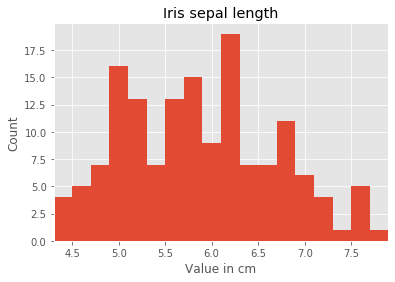

In [438]:
#Using matplotlib - shown on iris sepal length variable
plt.hist(dat, bins=num) # Earlier calculated number of bins
plt.xlabel("Value in cm")
plt.ylabel("Count")
plt.title("Iris sepal length")
plt.xlim(min(dat), max(dat))
plt.show()

### 4.2. Bar Plot<a name="bar"></a>

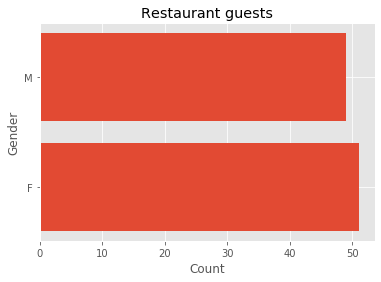

In [459]:
#Using matplotlib - shown on restaurant guests gender variable
dat=data["Restaurant guests"]["Gender"].value_counts()

plt.barh(y=dat.index,width=dat.values)
plt.title("Restaurant guests")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.yticks(dat.index)
plt.show()

### 4.3. Frequency Polygon<a name="freqpol"></a>

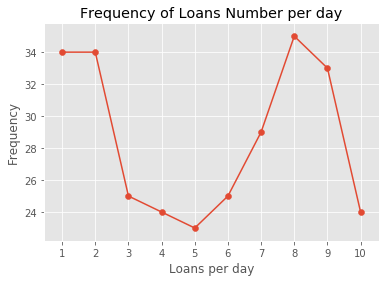

In [488]:
#Using matplotlib - shown on Frequency of Loans Number per day
plt.plot(DF["Absolute_Freq."].index, DF["Absolute_Freq."].values)
plt.scatter(DF["Absolute_Freq."].index, DF["Absolute_Freq."].values)
plt.xticks(DF["Absolute_Freq."].index)
plt.title('Frequency of Loans Number per day')
plt.xlabel("Loans per day")
plt.ylabel("Frequency")
plt.show()

### 4.4. Scatter Diagram<a name="scatter"></a>

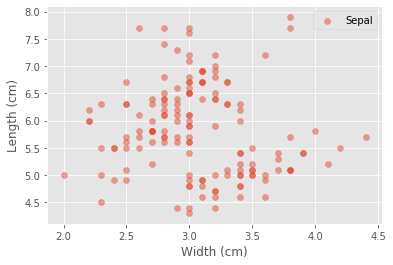

In [473]:
#Using matplotlib - shown on iris petal width and length variables
plt.scatter(iris["sepal width (cm)"], iris["sepal length (cm)"], label="Sepal",alpha=0.5)
plt.xlabel("Width (cm)")
plt.ylabel("Length (cm)")
plt.legend(loc="upper right")
plt.show()

### 4.5. Pie Plot<a name="pie"></a>

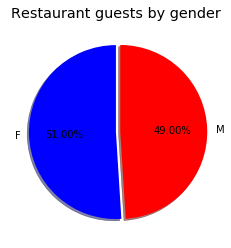

In [461]:
#Using matplotlib - shown on restaurant guests gender variable
dat=data["Restaurant guests"]["Gender"].value_counts()

slices=dat.values
lab=dat.index
cols = ["blue","red"]

plt.pie(slices,labels=lab,colors=cols,startangle=90,shadow= True,explode=(0,0.05),autopct='%1.2f%%')
plt.title('Restaurant guests by gender')
plt.show()

### 4.6. Box & Whisker Plot<a name="box"></a>

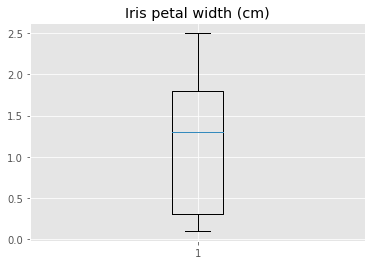

In [470]:
#Using matplotlib - shown on iris petal width variable
plt.boxplot(iris["petal width (cm)"])
plt.title("Iris petal width (cm)")
plt.show()

Note: Default whiskers are 1.5xIQR.    
We can see that iris petal width variable has no outliers

## 5. Exercises<a name="exercise"></a>
--------------------------------------------------------

### 5.1. Exercise 1<a name="ex1"></a>

In the given file „Data for Lab 1” in the sheet „Loans number” you have data about the number of given loans per day for one bank branch.

In [490]:
data["Loans Number"]

,Loans number per day Branch 1
0,4
1,7
2,1
3,9
4,1
...,...
281,2
282,5
283,8
284,3


Using that data draw the table with frequency distribution.

In [493]:
DF=data['Loans Number'].apply(pd.value_counts).sort_index()
DF.rename(columns={"Loans number per day Branch 1": "Absolute_Freq."},inplace=True)
DF

,Absolute_Freq.
1,34
2,34
3,25
4,24
5,23
6,25
7,29
8,35
9,33
10,24


After you draw that data calculate relative frequencies as a proportion.

Calculate relative frequencies as a percentage.

Calculate cumulative sequences for realtive and absolute frequencies.


In [494]:
DF["Relative_Prop"]=DF/DF.sum()
DF["Relative%"]=DF["Relative_Prop"]*100

DF["Cum_Relative_Prop"]=DF["Relative_Prop"].cumsum()
DF["Cum_Relative%"]=DF["Relative%"].cumsum()

DF

,Absolute_Freq.,Relative_Prop,Relative%,Cum_Relative_Prop,Cum_Relative%
1,34,0.118881,11.888112,0.118881,11.888112
2,34,0.118881,11.888112,0.237762,23.776224
3,25,0.087413,8.741259,0.325175,32.517483
4,24,0.083916,8.391608,0.409091,40.909091
5,23,0.080420,8.041958,0.489510,48.951049
6,25,0.087413,8.741259,0.576923,57.692308
7,29,0.101399,10.139860,0.678322,67.832168
8,35,0.122378,12.237762,0.800699,80.069930
9,33,0.115385,11.538462,0.916084,91.608392
10,24,0.083916,8.391608,1.000000,100.000000


Draw histogram of absolute frequencies.

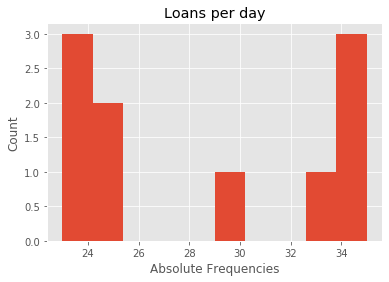

In [507]:
plt.hist(DF["Absolute_Freq."])
plt.xlabel("Absolute Frequencies")
plt.ylabel("Count")
plt.title("Loans per day")

plt.show()

In [506]:
DF["Absolute_Freq."]

1     34
2     34
3     25
4     24
5     23
6     25
7     29
8     35
9     33
10    24
Name: Absolute_Freq., dtype: int64

In [499]:
DF["Absolute_Freq."].values

array([34, 34, 25, 24, 23, 25, 29, 35, 33, 24], dtype=int64)